# **Proyecto 5** 



In [ ]:
!pip install pingouin

In [ ]:
import pandas as pd 
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt 

from scipy.stats import chi2_contingency
import pingouin as pg



## **Introduccion**

En este proyecto se desarrollará un análisis sobre una tabla de información clientes de una entidad bancaria, primero que todo se realizar una primera revisión y limpieza de los datos, luego se evidenciaran secciones donde se aplicaran conceptos como pruebas de hipótesis entre proporciones, medias, medianas, además de el uso de tablas de contingencia. Todo esto con el fin de analizar la distribución y el comportamiento de algunas variables. Algo a tener en cuenta dentro del desarollo de este proyecto es que todas las pruebas de hipotesis realizadas se hacen teniendo en cuenta un nivel de significancia del 5% 

## **Tabla de Contenido**

1. Exploracioón inicial de los datos
2. Limpieza de datos
3. Diferencia de propociones (Attrition Flag ~ Gender)
4. Distribución Normal ¿? (Customer Age - Dependet Count)
5. Diferencias media y mediana (Attrition Flag ~ Customer Age, Attrition Flag ~ Dependent Count)
6. Tablas de Contingencia
7. Pruebas Chi2 a Tablas de contingencia
8. Concluciones Intermedias 
9. Concluciones Finales


## **1. Expliración Inicial de los datos**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/labeconometria/MLxE/main/proyectos1er/dataset_2.csv')

In [ ]:
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


In [ ]:
df.tail(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.99788,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.99671,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.99662,0.003377


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

**Concluciones Exploracion Inicial de los datos** 

Una exploracion inidial de los datos permite observar que no cuentan con valores nulos para niguna de sus columnas, ademas que la tabla contiene varaibles tanto numericas como categoricas. Por otro lado se puede comentar que la infromacion que presenta la tabla es sobre los clientes de un banco.
 


## **2. Limpieza de datos**

### **Se eliminan algunas variables**

In [ ]:
df = df.iloc[:,1:-2]  # Se elimina la primea y ultimas dos columnas 

In [ ]:
df.columns = [columna.lower() for columna in df.columns]
df.head(3)

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


### **Se eliminan duplicados explicitos**

In [ ]:
print(f'Dimensiones de la tabla antes de eliminar duplicados {df.shape}')
df.drop_duplicates()
print(f'Dimensiones de la tabla despues de eliminar los duplicados {df.shape}')

Dimensiones de la tabla antes de eliminar duplicados (10127, 20)
Dimensiones de la tabla despues de eliminar los duplicados (10127, 20)


### **Se verifican si hay duplicados implicitos**

In [ ]:
for columna in df.columns:
  print(columna)
  print()
  print(df[columna].unique())
  print('____'*20)

attrition_flag

['Existing Customer' 'Attrited Customer']
________________________________________________________________________________
customer_age

[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
________________________________________________________________________________
gender

['M' 'F']
________________________________________________________________________________
dependent_count

[3 5 4 2 0 1]
________________________________________________________________________________
education_level

['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
________________________________________________________________________________
marital_status

['Married' 'Single' 'Unknown' 'Divorced']
________________________________________________________________________________
income_category

['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'U

### **Transformación tipo de datos** 

In [ ]:
for columna in [df.select_dtypes(include='object').columns]:
  df[columna] = df[columna].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            10127 non-null  category
 1   customer_age              10127 non-null  int64   
 2   gender                    10127 non-null  category
 3   dependent_count           10127 non-null  int64   
 4   education_level           10127 non-null  category
 5   marital_status            10127 non-null  category
 6   income_category           10127 non-null  category
 7   card_category             10127 non-null  category
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 non-null  int6

### **Análisis de missing values**

In [ ]:
print('Identificando el porcentaje de missing values por columna')
n = len(df)
resultados = pd.DataFrame()
variables = []
porcentajes = []
for columna in df.columns:
  porcentaje = df[columna].isna().sum()/n
  variables.append(columna)
  porcentajes.append(porcentaje)
resultados['Varaible'] = variables
resultados['Porcentaje de Missing Values'] = porcentajes

resultados


Identificando el porcentaje de missing values por columna


,Varaible,Porcentaje de Missing Values
0,attrition_flag,0.0
1,customer_age,0.0
2,gender,0.0
3,dependent_count,0.0
4,education_level,0.0
5,marital_status,0.0
6,income_category,0.0
7,card_category,0.0
8,months_on_book,0.0
9,total_relationship_count,0.0


### **Estadisticos descirptivos de los datos** 

In [ ]:
df.select_dtypes(include=['int64','float64']).describe()   # Datos Numericos

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
df.select_dtypes(include='category').describe()

,attrition_flag,gender,education_level,marital_status,income_category,card_category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


### **Concluciones Limpieza de datos** 

En esta seccion se logro identificar que dentro de las variables seleccionadas no habia valores duplicados de ningun tipo, ni explicito ni implicitos. Por otro lado se logro transformar las varaibles que correspondian a tipo categoria. Asi mismo se pudo observar de forma general estadisticsa descriptivas tanto de las variables numericas como las categoricas dentro de la tabla. Tambien se realizo un segundo analisis de posibles missing values.


## **3. Diferencia de proporciones attrition_falg y gender**

Se va a analizar si la diferencia entre proporciones de mujeres y hombres que hacen parte del grupo Existing Customer es significativa.

In [ ]:
df[['attrition_flag','gender']].head(3)

,attrition_flag,gender
0,Existing Customer,M
1,Existing Customer,F
2,Existing Customer,M


In [ ]:
print('Tabla de Contingencia \n')
print(pd.crosstab(df['attrition_flag'],df['gender']))
print()
print('Tabla de contingencia en proporciones \n')
print(pd.crosstab(df['attrition_flag'],df['gender']).apply(lambda x: x/x.sum(),axis=0))

Tabla de Contingencia 

gender                F     M
attrition_flag               
Attrited Customer   930   697
Existing Customer  4428  4072

Tabla de contingencia en proporciones 

gender                    F         M
attrition_flag                       
Attrited Customer  0.173572  0.146152
Existing Customer  0.826428  0.853848


In [ ]:
n = len(df)
proporcion_existing_customer = (df['attrition_flag'] == "Existing Customer").sum() / n
numero_mujeres = len(df[df['gender'] == 'F'])
numero_hombres = len(df[df['gender'] == 'M'])

print(f'Proporcion Existing Customer = {proporcion_existing_customer}')
print(f'Numero de Mujeres = {numero_mujeres}')
print(f'Numero de Hombres = {numero_hombres}')
print()
proporciones = df.groupby("gender")["attrition_flag"].agg([lambda x: np.mean(x=="Existing Customer"), "size"])
proporciones.columns = ['proporciones_Existing_Customer', 'total_genero']
proporciones

Proporcion Existing Customer = 0.8393403772094401
Numero de Mujeres = 5358
Numero de Hombres = 4769



,proporciones_Existing_Customer,total_genero
gender,,
F,0.826428,5358
M,0.853848,4769


**Se plantean las siguinete hipotesis para realizar la prueba**

$H_0: \pi_1 - \pi_2 = 0$

$H_0: \pi_1 - \pi_2 \neq 0$

In [ ]:
p = ((proporciones.total_genero.M * proporciones.proporciones_Existing_Customer.M) + (proporciones.total_genero.F * proporciones.proporciones_Existing_Customer.F )) / (proporciones.total_genero.F+proporciones.total_genero.M) 
p
media = proporciones.proporciones_Existing_Customer.M - proporciones.proporciones_Existing_Customer.F

z = media / np.sqrt(((p*(1-p))/proporciones.total_genero.F)+((p*(1-p))/proporciones.total_genero.M))
z 

pvalue = 2 * stats.norm.sf(abs(z))
print(f'Estadistico Z = {z}')
print(f'P-value = {pvalue}')

Estadistico Z = 3.750762428940761
P-value = 0.00017629768002806864


Se rechaza la hipotesis nula, de manera que si exite una diferencia significativa entre las porporciones de las variables

### **Concluciones**

Esta seccion permite concluir el hecho dw quw las proporciones qie se crean al cateogrizar a al variable attrition falg por genero, son estadisticamente significatias. De manera que estadisticamente la porpocion entre homnres que tienen una cuenta activa es diferentea la prporcion de mujeres que la tiene, lo cual podria permitir una diferencia en acceso a cuentas dependiendo del genero de un individuo

## **4. Distribución Normal¿?**

### **Customer Age**

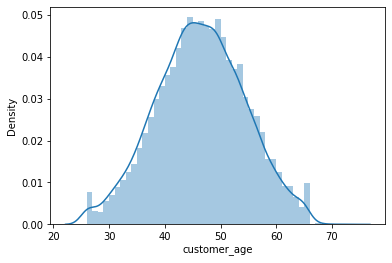

Kursotis: -0.28906985182953804
Skewness: -0.03360003857464426


In [ ]:
sns.distplot(df['customer_age'])
plt.show()
print('Kursotis:', stats.kurtosis(df['customer_age']))
print('Skewness:', stats.skew(df['customer_age']))

In [ ]:
shapiro_test = stats.shapiro(df['customer_age'])
print(f'RESULTADOS PRUEBA DE SHAPIRO\n ')
print(f'Estadistico = {shapiro_test[0]}')
print(f'P-Value = {shapiro_test[1]}')


RESULTADOS PRUEBA DE SHAPIRO
 
Estadistico = 0.9960706233978271
P-Value = 6.600162251926681e-16


El resultado de la prueba de shapiro no permite aceptar la hipotesis nula, de manera que la distribución de la variable customer_age no se comportaria como una normal.

### **Dependent_Count**

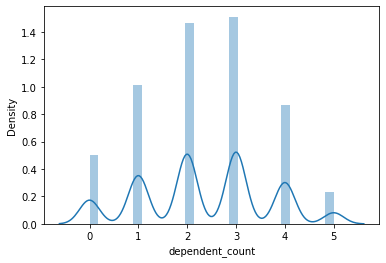

Kursotis: -0.6832718912052971
Skewness: -0.02082245083419453


In [ ]:
sns.distplot(df['dependent_count'])
plt.show()
print('Kursotis:', stats.kurtosis(df['dependent_count']))
print('Skewness:', stats.skew(df['dependent_count']))

In [ ]:
shapiro_test = stats.shapiro(df['dependent_count'])
print(f'RESULTADOS PRUEBA DE SHAPIRO\n ')
print(f'Estadistico = {shapiro_test[0]}')
print(f'P-Value = {shapiro_test[1]}')
# shapiro_test

RESULTADOS PRUEBA DE SHAPIRO
 
Estadistico = 0.936938464641571
P-Value = 0.0


El resultado de la prueba de shapiro no permite aceptar la hipotesis nula, de manera que la distribución de la variable dependet_count no se comportaria como una normal.

### **Concluciones**
 Por medio de un analizis grafico se podria pensar que la variable de la edad del cliente "Customer_Age" seguia una ditribucion normal, sin embargo al realizar una prueba estadistica se puede verificar que no es asi, de manera que ninguna de las dos variables princiaples de los datos se comporta bajo una distribución normal.


## **5. Diferencias media - mediana Attrition Flag ~ Customer Age, Attrition Flag ~  Dependent Count** 

### **Pruebas diferencia de medias - medianas Atrritiom Flag ~ customer Age**

In [ ]:
info1 = pd.pivot_table(data=df,index='attrition_flag',values='customer_age',aggfunc=['mean','median',np.var,'count'])
info1

,mean,median,var,count
,customer_age,customer_age,customer_age,customer_age
attrition_flag,,,,
Attrited Customer,46.659496,47,58.762215,1627
Existing Customer,46.262118,46,65.305095,8500


##### **Media**

Se establecen las siguiente hipotesis: 

$H_0: \bar{X_1}-\bar{X_2}=0$

$H_1: \bar{X_1}-\bar{X_2} \neq 0$

In [ ]:
# Grupo 1 --> Attried Customer
# Grupo 2 --> Existing Customer
media1 = info1['mean']['customer_age']['Attrited Customer']
media2 = info1['mean']['customer_age']['Existing Customer']

var1 = info1['var']['customer_age']['Attrited Customer']
var2 = info1['var']['customer_age']['Existing Customer']

n1 = info1['count']['customer_age']['Attrited Customer']
n2 = info1['count']['customer_age']['Existing Customer']

Z = (media1 - media2)/((var1/n1)+(var2/n2))**(1/2)
pvalue = 2 * stats.norm.sf(abs(Z))

print('RESULTADOS TEST')
print()
print(f'Estadistico Z = {Z}')
print(f'P-value = {pvalue}')
print(' ')
if pvalue>0.05:
  print('Se acepta la hipotesis nula, la diferencia entre medias de la varible customer_age segregada por la varaible attrition flag no es significativa')
else:
  print('Se acepta la hipotesis nula, la diferencia entre medias de la varible customer_age segregada por la varaible attrition flag es significativa')



RESULTADOS TEST

Estadistico Z = 1.898750197469021
P-value = 0.0575973281016259
 
Se acepta la hipotesis nula, la diferencia entre medias de la varible customer_age segregada por la varaible attrition flag no es significativa


#### **Mediana**

In [ ]:
# se usa el modulo pingouin para calcular mas facil la prueba de difernecias entre las medianas 
grupo1 = df['customer_age'][df['attrition_flag']=='Attrited Customer']
grupo2 = df['customer_age'][df['attrition_flag']=='Existing Customer']
resultados = pg.mwu(x=grupo1, y=grupo2, alternative='two-sided')
print(resultados)
print()
if resultados['p-val']['MWU'] > 0.05:
  print('Se acepta la hipotesis nula, la diferencia entre medianas de la varible Customer Age segregada por la varaible attrition flag no es significativa')
else:
  print('Se acepta la hipotesis nula, la diferencia entre medias de la varible Customer Age segregada por la varaible attrition flag es significativa')



         U-val alternative   p-val       RBC      CLES
MWU  7104960.5   two-sided  0.0781 -0.027508  0.513754

Se acepta la hipotesis nula, la diferencia entre medianas de la varible Customer Age segregada por la varaible attrition flag no es significativa


### **Pruebas diferencia de medias - medianas Atrritiom Flag ~ Dependent count**

In [ ]:
info2 = pd.pivot_table(data=df,index='attrition_flag',values='dependent_count',aggfunc=['mean','median',np.var,'count'])
info2

,mean,median,var,count
,dependent_count,dependent_count,dependent_count,dependent_count
attrition_flag,,,,
Attrited Customer,2.402581,2,1.625651,1627
Existing Customer,2.335412,2,1.698405,8500


#### **Media**

Se establecen las siguiente hipotesis: 

$H_0: \bar{X_1}-\bar{X_2}=0$

$H_1: \bar{X_1}-\bar{X_2} \neq 0$

In [ ]:
# Grupo 1 --> Attried Customer
# Grupo 2 --> Existing Customer
media1 = info2['mean']['dependent_count']['Attrited Customer']
media2 = info2['mean']['dependent_count']['Existing Customer']

var1 = info2['var']['dependent_count']['Attrited Customer']
var2 = info2['var']['dependent_count']['Existing Customer']

n1 = info2['count']['dependent_count']['Attrited Customer']
n2 = info2['count']['dependent_count']['Existing Customer']

Z = (media1 - media2)/((var1/n1)+(var2/n2))**(1/2)
pvalue = 2 * stats.norm.sf(abs(Z))

print('RESULTADOS TEST')
print()
print(f'Estadistico Z = {Z}')
print(f'P-value = {pvalue}')
print(' ')
if pvalue>0.05:
  print('Se acepta la hipotesis nula, la diferencia entre medias de la varible Dependent Count segregada por la varaible attrition flag no es significativa')
else:
  print('Se acepta la hipotesis nula, la diferencia entre medias de la varible Dependent Count segregada por la varaible attrition flag es significativa')



RESULTADOS TEST

Estadistico Z = 1.9398433006370526
P-value = 0.052398736502265515
 
Se acepta la hipotesis nula, la diferencia entre medias de la varible Dependent Count segregada por la varaible attrition flag no es significativa


#### **Mediana**

In [ ]:
# se usa el modulo pingouin para calcular mas facil la prueba de difernecias entre las medianas 
grupo1 = df['dependent_count'][df['attrition_flag']=='Attrited Customer']
grupo2 = df['dependent_count'][df['attrition_flag']=='Existing Customer']
resultados = pg.mwu(x=grupo1, y=grupo2, alternative='two-sided')
print(resultados)
print()
if resultados['p-val']['MWU'] > 0.05:
  print('Se acepta la hipotesis nula, la diferencia entre medianas de la varible dependent_count segregada por la varaible attrition flag no es significativa')
else:
  print('Se acepta la hipotesis nula, la diferencia entre medias de la varible dependent_count segregada por la varaible attrition flag es significativa')


         U-val alternative     p-val       RBC      CLES
MWU  7137310.0   two-sided  0.034729 -0.032186  0.516093

Se acepta la hipotesis nula, la diferencia entre medias de la varible dependent_count segregada por la varaible attrition flag es significativa


## **6. Tablas de contingencia** 

### **Attrition Flag ~ Gender**

In [ ]:
contingencia1 = pd.crosstab(df['attrition_flag'],df['gender'])
contingencia1

gender,F,M
attrition_flag,,
Attrited Customer,930,697
Existing Customer,4428,4072


### **Attrition Flag ~ Education Level**

In [ ]:
contingencia2 = pd.crosstab(df['attrition_flag'],df['education_level'])
contingencia2

education_level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
attrition_flag,,,,,,,
Attrited Customer,154,95,487,306,92,237,256
Existing Customer,859,356,2641,1707,424,1250,1263


### **Attrition Flag ~ Marital Satuts**

In [ ]:
contingencia3 = pd.crosstab(df['attrition_flag'],df['marital_status'])
contingencia3

marital_status,Divorced,Married,Single,Unknown
attrition_flag,,,,
Attrited Customer,121,709,668,129
Existing Customer,627,3978,3275,620


### **Attrition Flag ~ Income Category**

In [ ]:
contingencia4 = pd.crosstab(df['attrition_flag'],df['income_category'])
contingencia4

income_category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
attrition_flag,,,,,,
Attrited Customer,126,271,189,242,612,187
Existing Customer,601,1519,1213,1293,2949,925


### **Attrition Flag ~ Card Category**

In [ ]:
contingencia5 = pd.crosstab(df['attrition_flag'],df['card_category'])
contingencia5

card_category,Blue,Gold,Platinum,Silver
attrition_flag,,,,
Attrited Customer,1519,21,5,82
Existing Customer,7917,95,15,473


## **7. Pruebas Chi2 a Tablas de Contingencia**


In [ ]:
def resultados_prueba_chi2(test,variable):
  print(' ')
  print(f'Estadistico Test = {test[0]}')
  print(f'P-value = {test[1]}')
  print(f'Grados de Libertad = {test[2]}')
  print(' ')
  if test[1] > 0.05:
    print(f'Se Acepta Hipotesis Nula, No hay diferencia significativa entre el attrition flag segun {variable}')
  else:
    print(f'Se Rechaza Hipotesis Nula, Hay una diferencia significativa entre el attrition flag segun {variable}')


### **Attrition Flag ~ Gender**

In [ ]:
test1 = chi2_contingency(contingencia1)
resultados_prueba_chi2(test1,'Gender')

 
Estadistico Test = 13.865613700637342
P-value = 0.00019635846717310269
Grados de Libertad = 1
 
Se Rechaza Hipotesis Nula, Hay una diferencia significativa entre el attrition flag segun Gender


### **Attrition Flag ~ Education Level**

In [ ]:
test2 = chi2_contingency(contingencia2)
resultados_prueba_chi2(test2,'Education Level')

 
Estadistico Test = 12.51120540483051
P-value = 0.05148913147336627
Grados de Libertad = 6
 
Se Acepta Hipotesis Nula, No hay diferencia significativa entre el attrition flag segun Education Level


### **Attrition Flag ~ Marital Satuts**

In [ ]:
test3 = chi2_contingency(contingencia3)
resultados_prueba_chi2(test3,'Marital Sattus')

 
Estadistico Test = 6.056097396726619
P-value = 0.10891263394840227
Grados de Libertad = 3
 
Se Acepta Hipotesis Nula, No hay diferencia significativa entre el attrition flag segun Marital Sattus


### **Attrition Flag ~ Income Category**

In [ ]:
test4 = chi2_contingency(contingencia4)
resultados_prueba_chi2(test4,'Income Category')

 
Estadistico Test = 12.832259274756895
P-value = 0.025002425704390617
Grados de Libertad = 5
 
Se Rechaza Hipotesis Nula, Hay una diferencia significativa entre el attrition flag segun Income Category


### **Attrition Flag ~ Card Category**

In [ ]:
test5 = chi2_contingency(contingencia5)
resultados_prueba_chi2(test5,'Card Category')

 
Estadistico Test = 2.2342267000046805
P-value = 0.5252382797994759
Grados de Libertad = 3
 
Se Acepta Hipotesis Nula, No hay diferencia significativa entre el attrition flag segun Card Category


## **Conclusiones Finales**

Dentro de las conclusiones finales mas importantes se puede destacar el hecho de que algunas de las variables a la cuales se le realizo la prueba chi cuadrado para las respectivas tablas de contingencia resulta que no hay diferencias significativas entre las proporciones que se generan al cateogrizar a los individuos bajos las dos condiciones dadas, esto en contra pocision a la pruebas de hipotesis que dan e lresultado contrario permitiria analizar que varoables son mas significativas a la hora de determinar si un individuo tiene la capacidad para tener una cuenta activa o no tenerla.